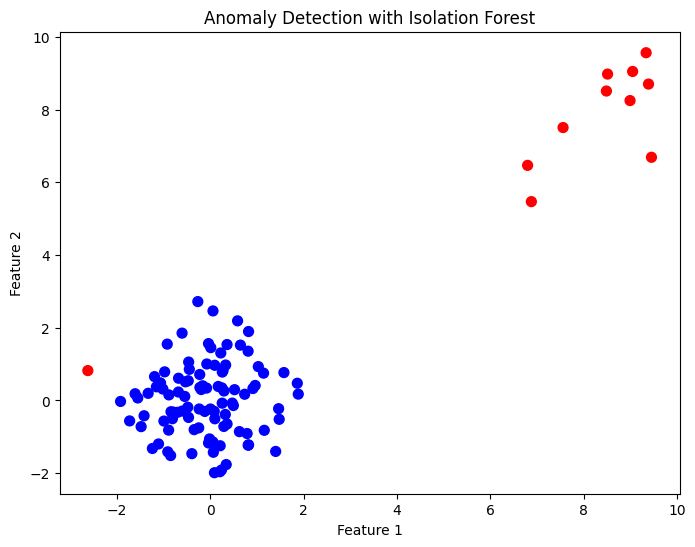


Sample of detected anomalies:
     Feature 1  Feature 2  Anomaly
37   -2.619745   0.821903  Anomaly
100   9.386865   8.703843  Anomaly
101   8.485079   8.512420  Anomaly
102   6.797456   6.467959  Anomaly
103   9.046806   9.050567  Anomaly
104   9.335362   9.566203  Anomaly
105   7.556712   7.507581  Anomaly
106   8.991476   8.249820  Anomaly
107   8.509834   8.978963  Anomaly
108   9.450027   6.689976  Anomaly
109   6.877915   5.469910  Anomaly


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic dataset
np.random.seed(42)

# Generate normal data points (e.g., 2D)
normal_data = np.random.normal(0, 1, (100, 2))

# Introduce some anomaly points (outliers)
anomalies = np.random.uniform(low=5, high=10, size=(10, 2))

# Combine normal data with anomalies
data = np.vstack([normal_data, anomalies])

# Convert to DataFrame for convenience
df = pd.DataFrame(data, columns=["Feature 1", "Feature 2"])

# Step 2: Apply Isolation Forest
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Standardize the data before applying Isolation Forest

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = model.fit_predict(scaled_data)

# Anomalies are marked as -1 and normal points as 1
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Step 3: Visualize the dataset with detected anomalies
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 1'], df['Feature 2'], c=df['Anomaly'].map({'Normal': 'blue', 'Anomaly': 'red'}), s=50)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print a sample of detected anomalies
print("\nSample of detected anomalies:")
print(df[df['Anomaly'] == 'Anomaly'])
